In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import sklearn.model_selection
import sklearn.metrics
import sklearn.ensemble
import sklearn.linear_model
import sklearn.tree
import sklearn.neighbors

In [136]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor


In [16]:
df_original = pd.read_csv("/content/Melbourne_housing_FULL.csv")
df = df_original.copy()
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [18]:
print(f'Shape  : {df.shape}\n'f'Size   : {df.size}\n'f'Dimension   : {df.ndim}')

Shape  : (34857, 21)
Size   : 731997
Dimension   : 2


In [19]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [20]:
df.duplicated().sum()

1

In [21]:
df.loc[df.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [22]:
#Dropping the duplicate values from the dataset
df = df.drop_duplicates()

In [23]:
#Reseting the indexes after dropping some rows
df = df.reset_index(drop=True)

In [24]:
print(f'Shape  : {df.shape}\n'f'Size   : {df.size}\n'f'Dimension   : {df.ndim}')

Shape  : (34856, 21)
Size   : 731976
Dimension   : 2


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34856.0,3.031013e+00,0.969947,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34855.0,1.118481e+01,6.788952,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34855.0,3.116062e+03,109.025437,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26639.0,3.084650e+00,0.980708,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26630.0,1.624747e+00,0.724177,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26128.0,1.728835e+00,1.010789,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23046.0,5.936072e+02,3398.915462,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13741.0,1.602516e+02,401.281270,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15550.0,1.965288e+03,37.328340,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [26]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [34]:
cat_cols = ['Type', 'Method', 'Regionname']
num_cols = ['Rooms', 'Price', 'Postcode', 'Propertycount', 'Distance',
            'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
            'YearBuilt', 'Lattitude', 'Longtitude']

In [28]:
for column in cat_cols:
  df[column] = df[column].astype('category')

In [32]:
for column in cat_cols:
  categories = df[column].cat.categories
  print(categories)

Index(['h', 't', 'u'], dtype='object')
Index(['PI', 'PN', 'S', 'SA', 'SN', 'SP', 'SS', 'VB', 'W'], dtype='object')
Index(['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan',
       'Northern Victoria', 'South-Eastern Metropolitan',
       'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria'],
      dtype='object')


In [33]:
df.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0


In [37]:
columns = ["Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode",
           "Bedroom", "Bathroom" , "Car" , "Landsize" , "BuildingArea" , "YearBuilt" , "CouncilArea" ,
           "Lattitude" , "Longtitude", "Regionname", "Propertycount"]


I VISUALIZED THE COLUMNS WITH THE HIGHEST STANDARD DEVIATION ON ORDER TO EXAMINE OUTLIERS

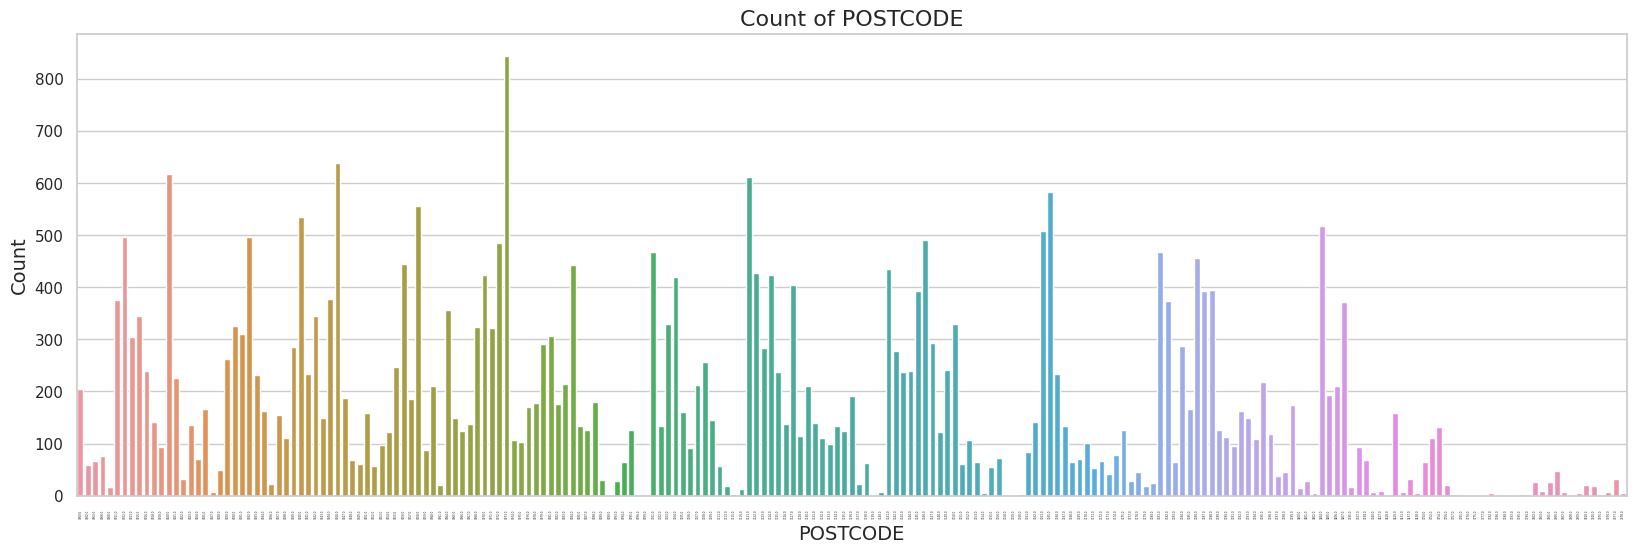

In [76]:
# Create a count plot for the 'Postcode' column
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
ax = sns.countplot(data=df, x='Postcode')

# Set the labels and title
ax.set_xlabel('POSTCODE', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title("Count of POSTCODE", fontsize=16)

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=2)
plt.show()

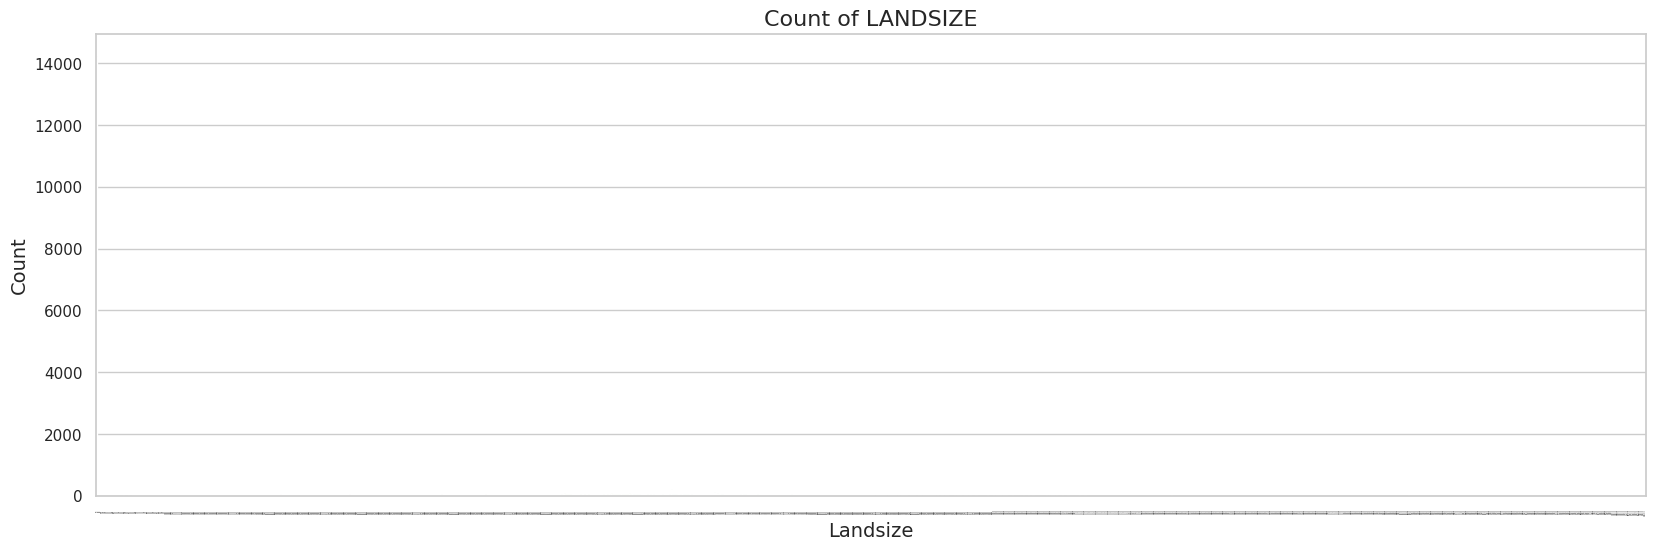

In [87]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
ax = sns.countplot(data=df, x='Landsize')

# Set the labels and title
ax.set_xlabel('Landsize', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title("Count of LANDSIZE", fontsize=16)

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=1)
plt.show()

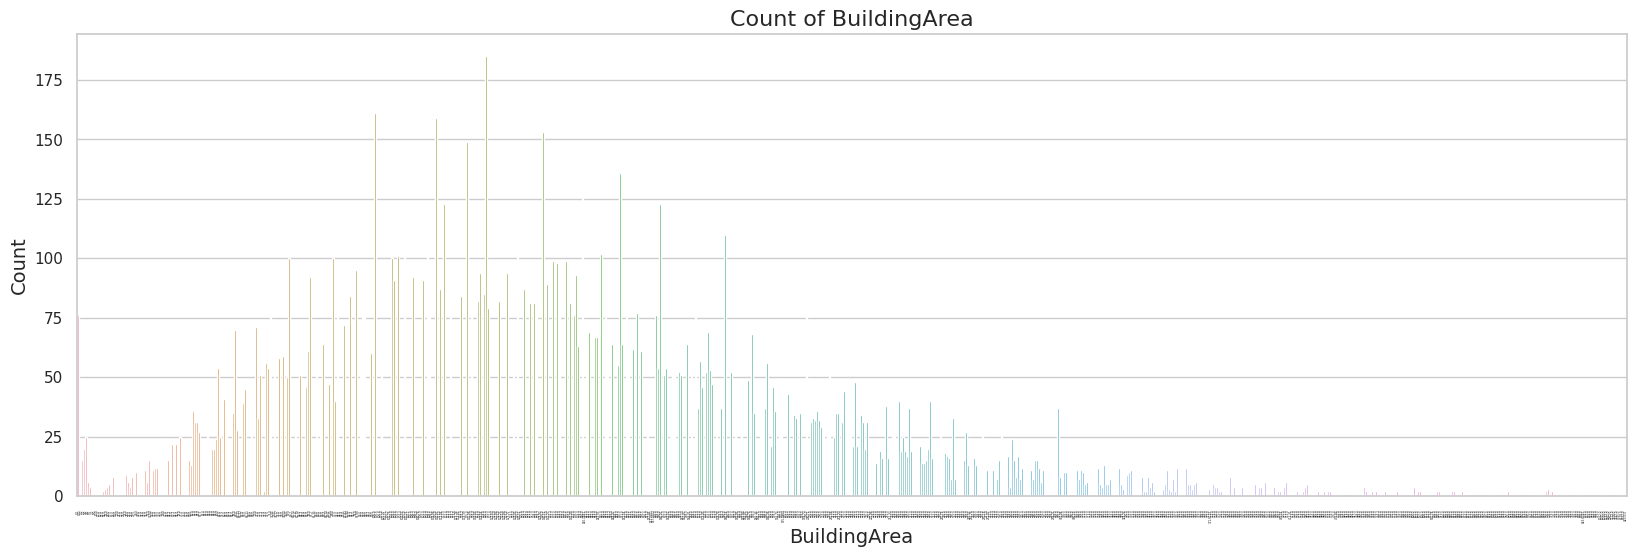

In [78]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
ax = sns.countplot(data=df, x='BuildingArea')

# Set the labels and title
ax.set_xlabel('BuildingArea', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title("Count of BuildingArea", fontsize=16)

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=2)
plt.show()

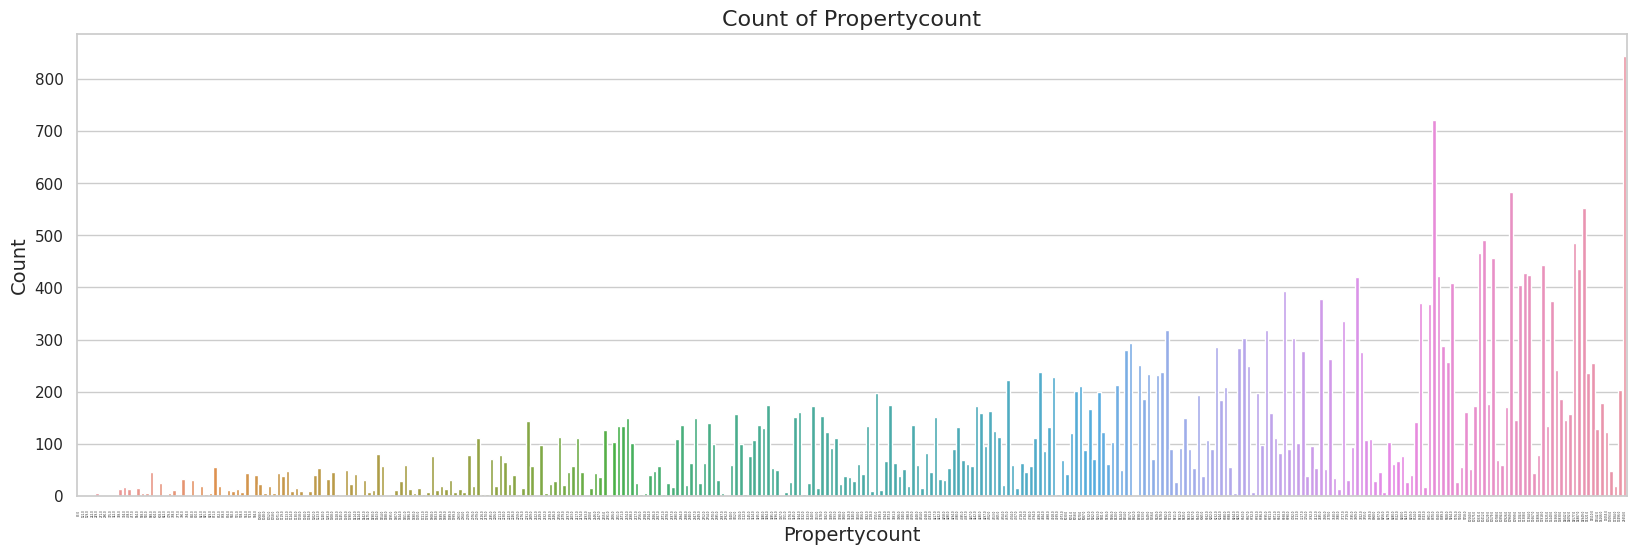

In [80]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
ax = sns.countplot(data=df, x='Propertycount')

# Set the labels and title
ax.set_xlabel('Propertycount', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title("Count of Propertycount", fontsize=16)

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=2)
plt.show()

In [81]:
for column in cat_cols:
  df[column] = df[column].fillna(df[column].mode().iloc[0])

In [85]:
for column in num_cols:
  df[column] = df[column].fillna(df[column].mode().iloc[0])

In [86]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      3
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [93]:
#clearing the outliers from the dataset
#For Landsize:
landsize_mean = df['Landsize'].mean()
landssize_std = df['Landsize'].std()
print("Landsize mean is: ", landsize_mean)
print("Landsize std is: " ,landssize_std)

lower_limit = landsize_mean - 3*landssize_std
upper_limit = landsize_mean + 3*landssize_std
print("Lower Limit for Landsize: ", lower_limit)
print("Upper Limit for Landsize: ", upper_limit)

Landsize mean is:  392.4796591691531
Landsize std is:  2777.978408106899
Lower Limit for Landsize:  -7941.455565151545
Upper Limit for Landsize:  8726.414883489851


In [100]:
df_no_outliers = df[(df.Landsize < upper_limit) & (df.Landsize > lower_limit)]
df_no_outliers.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,600000.0,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,120.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,120.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,600000.0,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,120.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [102]:
#clearing the outliers from the dataset
#For BuildingArea:
buildingarea_mean = df['BuildingArea'].mean()
buildingarea_std = df['BuildingArea'].std()
print("BuildingArea mean is: ", buildingarea_mean)
print("BuildingArea std is: " ,buildingarea_std)

lower_limit = buildingarea_mean - 3*buildingarea_std
upper_limit = buildingarea_mean + 3*buildingarea_std
print("Lower Limit for BuildingArea: ", lower_limit)
print("Upper Limit for BuildingArea: ", upper_limit)

BuildingArea mean is:  135.86807016582512
BuildingArea std is:  252.7140160731912
Lower Limit for BuildingArea:  -622.2739780537485
Upper Limit for BuildingArea:  894.0101183853986


In [103]:
df_no_outliers = df[(df.BuildingArea < upper_limit) & (df.BuildingArea > lower_limit)]
df_no_outliers.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,600000.0,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,120.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,120.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,600000.0,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,120.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [104]:
df_no_outliers.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34839.000000,3.483900e+04,34839.000000,34839.00000,34839.000000,34839.000000,34839.000000,34839.000000,34839.000000,34839.000000,34839.000000,34839.000000,34839.000000
mean,3.030741,9.518715e+05,11.182574,3116.03984,3.064468,1.476994,1.796435,391.033468,133.521153,1967.902121,-37.816470,145.000646,7574.399150
std,0.969689,5.968642e+05,6.782713,109.01889,0.857845,0.685931,0.882277,2768.495646,56.352239,25.040062,0.079937,0.105525,4430.159366
min,1.000000,8.500000e+04,0.000000,3000.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.000000e+05,6.400000,3051.00000,3.000000,1.000000,1.000000,0.000000,120.000000,1970.000000,-37.846900,144.964400,4385.000000
50%,3.000000,7.300000e+05,10.300000,3103.00000,3.000000,1.000000,2.000000,218.000000,120.000000,1970.000000,-37.836100,144.996600,6763.000000
75%,4.000000,1.150000e+06,14.000000,3156.00000,3.000000,2.000000,2.000000,598.000000,120.000000,1970.000000,-37.770900,145.051710,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.00000,30.000000,12.000000,26.000000,433014.000000,859.000000,2106.000000,-37.390200,145.526350,21650.000000


In [105]:
df = df_no_outliers
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,600000.0,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,120.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,120.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,600000.0,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,120.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


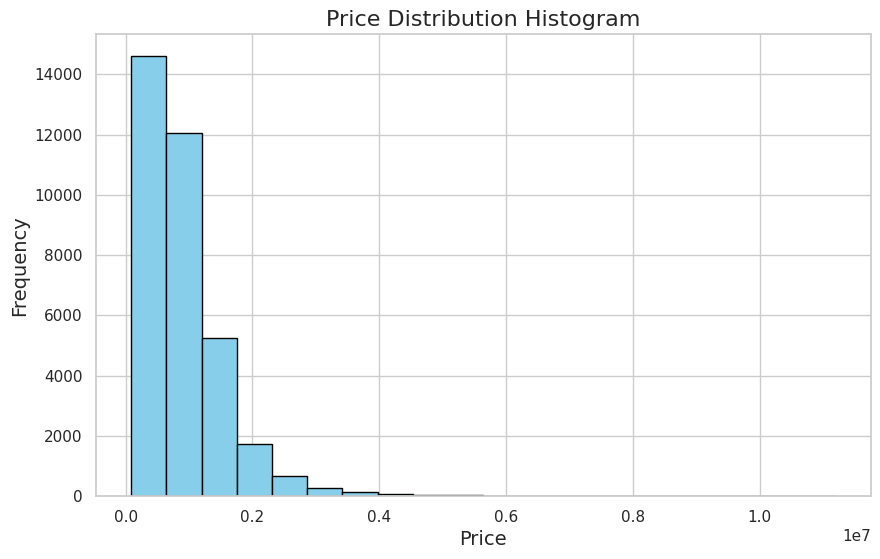

In [106]:
prices = df['Price']

# Set the figure size and plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(prices, bins=20, color='skyblue', edgecolor='black')
plt.title('Price Distribution Histogram', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the histogram
plt.show()


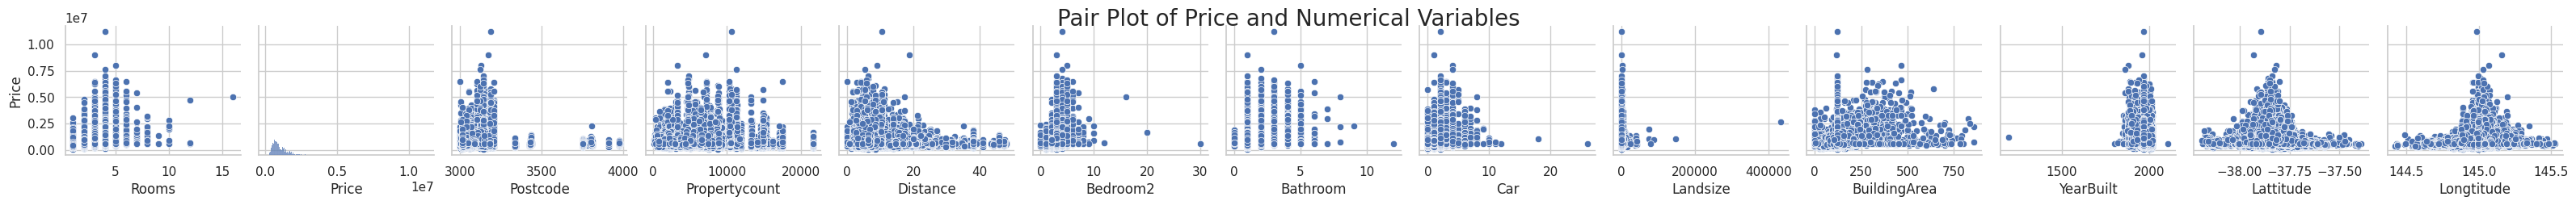

In [122]:
sns.pairplot(df, x_vars = num_cols, y_vars = ['Price'])

# Title
plt.suptitle('Pair Plot of Price and Numerical Variables' ,size = 20);


<ipython-input-123-85967c343b00>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

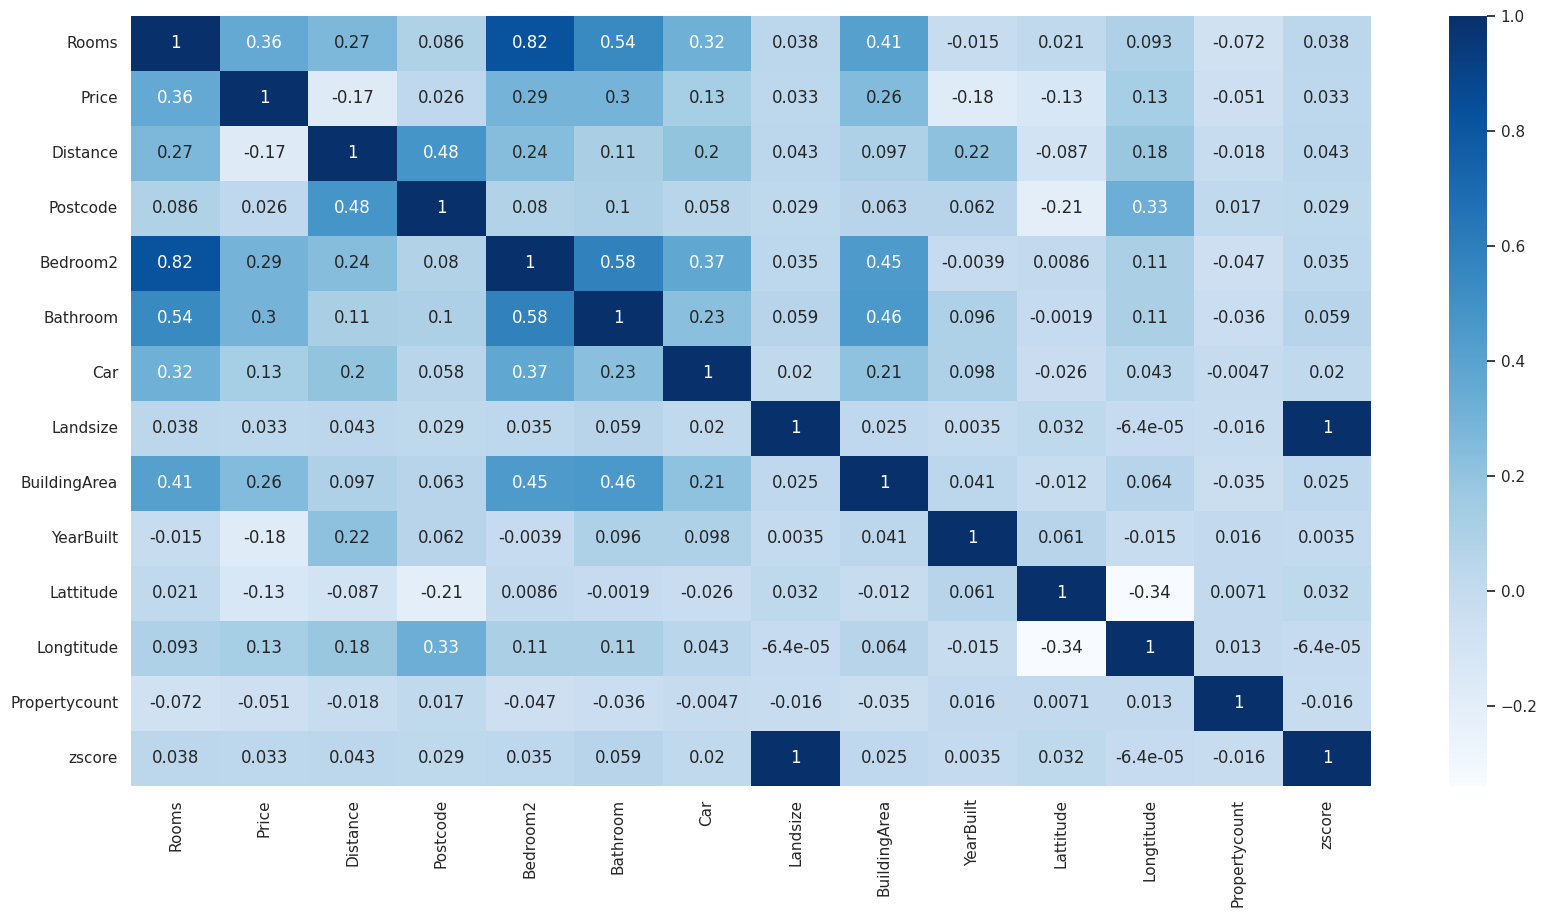

In [123]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True)

In [125]:
#Encoding
def one_hot_encoder(dataframe, categorical_col, drop_first=True):
  dataframe = pd.get_dummies(dataframe, columns=cat_cols, drop_first=drop_first)
  return dataframe

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
df = one_hot_encoder(df, ohe_cols, drop_first=True)

In [128]:
df = df.drop('zscore', axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34839 entries, 0 to 34855
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Suburb                                 34839 non-null  object 
 1   Address                                34839 non-null  object 
 2   Rooms                                  34839 non-null  int64  
 3   Price                                  34839 non-null  float64
 4   SellerG                                34839 non-null  object 
 5   Date                                   34839 non-null  object 
 6   Distance                               34839 non-null  float64
 7   Postcode                               34839 non-null  float64
 8   Bedroom2                               34839 non-null  float64
 9   Bathroom                               34839 non-null  float64
 10  Car                                    34839 non-null  float64
 11  La

In [180]:
obj_cols = ['Suburb', 'Address', 'SellerG', 'Date', 'CouncilArea']

STARTING WITH MODEL TRAINING

In [151]:
from sklearn.model_selection import train_test_split


In [193]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [156]:
y = df['Price']
X = df.drop('Price',axis=1)


In [162]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [183]:
for column in obj_cols:
  X[column] = label_encoder.fit_transform(X[column])


In [185]:
X = X.drop('Suburb_encoded',axis=1)
X = X.drop('Address_encoded',axis=1)
X = X.drop('SellerG_encoded',axis=1)
X = X.drop('Date_encoded',axis=1)
X = X.drop('CouncilArea_encoded',axis=1)
X

,Suburb,Address,Rooms,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,...,Method_SS,Method_VB,Method_W,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0,29444,2,155,58,2.5,3067.0,2.0,1.0,1.0,...,1,0,0,0,1,0,0,0,0,0
1,0,32497,2,33,60,2.5,3067.0,2.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
2,0,15382,2,33,63,2.5,3067.0,2.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,0,9765,3,296,63,2.5,3067.0,3.0,2.0,1.0,...,0,1,0,0,1,0,0,0,0,0
4,0,25116,3,33,64,2.5,3067.0,3.0,2.0,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,348,5860,4,152,38,6.3,3013.0,4.0,1.0,3.0,...,0,0,0,0,0,0,0,0,1,0
34852,348,16973,2,321,38,6.3,3013.0,2.0,2.0,1.0,...,0,0,0,0,0,0,0,0,1,0
34853,348,7348,2,152,38,6.3,3013.0,2.0,1.0,2.0,...,0,0,0,0,0,0,0,0,1,0
34854,348,5419,3,370,38,6.3,3013.0,3.0,1.0,2.0,...,0,0,0,0,0,0,0,0,1,0


In [186]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42 )

In [187]:
models = { 'Lasso': {
'model': Lasso() },
'LinearRegression': {
'model': LinearRegression()
}, 'Ridge': {
'model': Ridge() },
'ElasticNet': {
'model': ElasticNet()
}, 'KNeighborsRegressor': {
'model': KNeighborsRegressor() },
'RandomForestRegressor': {
'model': RandomForestRegressor()
}, 'GradientBoostingRegressor': {
'model': GradientBoostingRegressor() },
'AdaBoostRegressor': {
'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
}}

In [196]:
model_metrics = {}

In [198]:
for model_name, model_info in models.items():
    model = model_info['model']

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store the metrics in the model_metrics dictionary
    model_metrics[model_name] = {
        'Mean Squared Error (MSE)': mse,
        'Mean Absolute Error (MAE)': mae,
        'Root Mean Squared Error (RMSE)': rmse,
        'R-squared (R2)': r2
    }

for model_name, metrics in model_metrics.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")
    print()




Model: Lasso
Mean Squared Error (MSE): 222837624128.91986
Mean Absolute Error (MAE): 303230.4196947777
Root Mean Squared Error (RMSE): 472056.80180346925
R-squared (R2): 0.3674136956097406

Model: LinearRegression
Mean Squared Error (MSE): 222837778376.4945
Mean Absolute Error (MAE): 303233.0308757817
Root Mean Squared Error (RMSE): 472056.9651816341
R-squared (R2): 0.36741325773528555

Model: Ridge
Mean Squared Error (MSE): 222826624374.18436
Mean Absolute Error (MAE): 303203.63935560064
Root Mean Squared Error (RMSE): 472045.15077922825
R-squared (R2): 0.3674449214596145

Model: ElasticNet
Mean Squared Error (MSE): 251836636361.38223
Mean Absolute Error (MAE): 327504.9591858083
Root Mean Squared Error (RMSE): 501833.275462461
R-squared (R2): 0.2850919689677063

Model: KNeighborsRegressor
Mean Squared Error (MSE): 337686101400.0816
Mean Absolute Error (MAE): 383457.934098737
Root Mean Squared Error (RMSE): 581107.6504401587
R-squared (R2): 0.04138448898087577

Model: RandomForestRegre

In [210]:
# Print the best model for each metric
best_models = {metric_name: min(model_metrics, key=lambda x: model_metrics[x][metric_name]) for metric_name in average_scores}

print("Best Models for Each Metric:")
for metric_name, best_model in best_models.items():
    print(f"{metric_name}: {best_model}")



Best Models for Each Metric:
Mean Squared Error (MSE): RandomForestRegressor
Mean Absolute Error (MAE): RandomForestRegressor
Root Mean Squared Error (RMSE): RandomForestRegressor
R-squared (R2): KNeighborsRegressor
Mean Squared Error (MSE)_rank: RandomForestRegressor


In [212]:
# Create a dictionary to store the average metric scores for each model
average_metric_scores = {}

# Iterate through the models and calculate the average metric score for each model
for model_name, metrics in model_metrics.items():
    model_scores = metrics.values()
    average_score = sum(model_scores) / len(model_scores)
    average_metric_scores[model_name] = average_score

# Print the average metric scores for each model
for model_name, average_score in average_metric_scores.items():
    print(f"Model: {model_name}, Average Metric Score: {average_score}")

# Choose the best model based on the highest average metric score
best_model = max(average_metric_scores, key=average_metric_scores.get)
print()
print(f"The best model is: {best_model}")


Model: Lasso, Average Metric Score: 44567679884.10175
Model: LinearRegression, Average Metric Score: 44567710734.3716
Model: Ridge, Average Metric Score: 44565479925.26839
Model: ElasticNet, Average Metric Score: 50367493141.1804
Model: KNeighborsRegressor, Average Metric Score: 67537413194.7415
Model: RandomForestRegressor, Average Metric Score: 38636781076.69332
Model: GradientBoostingRegressor, Average Metric Score: 40086595516.669754
Model: AdaBoostRegressor, Average Metric Score: 56838582970.57817

The best model is: KNeighborsRegressor
